In [1]:
from matplotlib import pyplot as plt

In [2]:
def plot_word_count_vs_frame(frame_text_data: list, output_path: str) -> None:
    """
    Plot the number of words versus frame number and save as PNG.

    Args:
        frame_text_data (list): List of tuples containing (frame_number, text).
        output_path (str): Path to save the plot PNG.
    """
    frame_numbers = [data[0] for data in frame_text_data]
    word_counts = [len(data[1].split()) for data in frame_text_data]

    plt.figure(figsize=(16, 8))
    plt.plot(frame_numbers, word_counts, marker='o')
    plt.title('Number of Words vs Frame Number')
    plt.xlabel('Frame Number')
    plt.ylabel('Number of Words')
    
    # Add both vertical and horizontal gridlines
    plt.grid(True, axis='both', linestyle='--', alpha=0.7)
    
    # Ensure all frame numbers are visible on x-axis
    plt.xticks(frame_numbers, rotation=45, ha='right')
    
    # Ensure all word counts are visible on y-axis
    min_count = min(word_counts)
    max_count = max(word_counts)
    plt.ylim(max(0, min_count - 1), max_count + 1)
    plt.yticks(range(max(0, min_count - 1), max_count + 2))
    
    # Adjust layout to prevent cutting off axis labels
    plt.tight_layout()
    
    plt.savefig(output_path, dpi=300)
    plt.close()

In [3]:
import pickle

In [4]:
# D:\DPythonProjects\yt_summarizer\data\zfaohh_frames
frame_text_data_pkl = r"D:\DPythonProjects\yt_summarizer\data\ixfwsm_frame_text_data\frame_text_data.pkl"

In [5]:
frame_text_data = pickle.load(open(frame_text_data_pkl, "rb"))

In [6]:
frame_text_data

[(0,
  '= ChatGPT ~ g\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\ne J\n. at > a\nah\nvt\n7 7\nvt ¥ i;\ni f\n——\n© ; SS\n'),
 (1,
  '= ChatGPT v G\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\nS A y\ni at\nay\ni r) .\nr! f \\\n'),
 (2,
  "= ChatGPT v G\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\n© j ; j =)\n) =\n7 at 4\nay\ni (\\\\ \\j\nm ff .\n' N qj\n"),
 (3,
  '= ChatGPT Gq\nfee eect\nlanguage for enterprise(big)\napplications? Show some graph for\ncihoapenttmersoci\n® : " 3 y\n5 R\\\\ KX\nMy :\ny ) v\n. ‘a %\n“PANS\n'),
 (4,
  '= ChatGPT ~ G\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\n6 :\nat\n‘ae\nhs) . MA\n> Nees\n'),
 (5,
  "= ChatGPT v G\nMost popular programming\nlanguage f

In [7]:
frame_numbers = [data[0] for data in frame_text_data]
word_counts = [len(data[1].split()) for data in frame_text_data]

In [8]:
def p(frame_numbers, word_counts):
    """
    Plot the number of words versus frame number and save as PNG.

    Args:
        frame_text_data (list): List of tuples containing (frame_number, text).
        output_path (str): Path to save the plot PNG.
    """


    # plt.figure(figsize=(16, 8))
    # larger figure so that all frame numbers are visible on x-axis
    # plt.figure(figsize=(20, 8))
    # find the size of the figure depending on the number of frames and the values of word_counts
    weight_y = 10
    weight_x = 7
    plt.figure(figsize=(len(frame_numbers) / weight_x, max(word_counts) /weight_y))
    plt.plot(frame_numbers, word_counts, marker='o')
    plt.title('Number of Words vs Frame Number')
    plt.xlabel('Frame Number')
    plt.ylabel('Number of Words')

    # Add both vertical and horizontal gridlines
    plt.grid(True, axis='both', linestyle='--', alpha=0.7)

    # Ensure all frame numbers are visible on x-axis
    plt.xticks(frame_numbers, rotation=45, ha='right')

    # Ensure all word counts are visible on y-axis
    min_count = min(word_counts)
    max_count = max(word_counts)
    plt.ylim(max(0, min_count - 1), max_count + 1)
    # plt.yticks(range(max(0, min_count - 1), max_count + 2))    # Set y-ticks to only show values present in the data
    unique_word_counts = sorted(set(word_counts))
    plt.yticks(unique_word_counts)

    # Adjust layout to prevent cutting off axis labels
    plt.tight_layout()

    # plt.savefig(output_path, dpi=300)
    # plt.close()

In [9]:
# create new np array taking only small size of the data
import numpy as np
frame_numbers = np.array(frame_numbers) 
word_counts = np.array(word_counts)


In [10]:

# i want contiguous slice
start = 226
end = 424
nframe_numbers = frame_numbers[start:end]
nword_counts = word_counts[start:end]

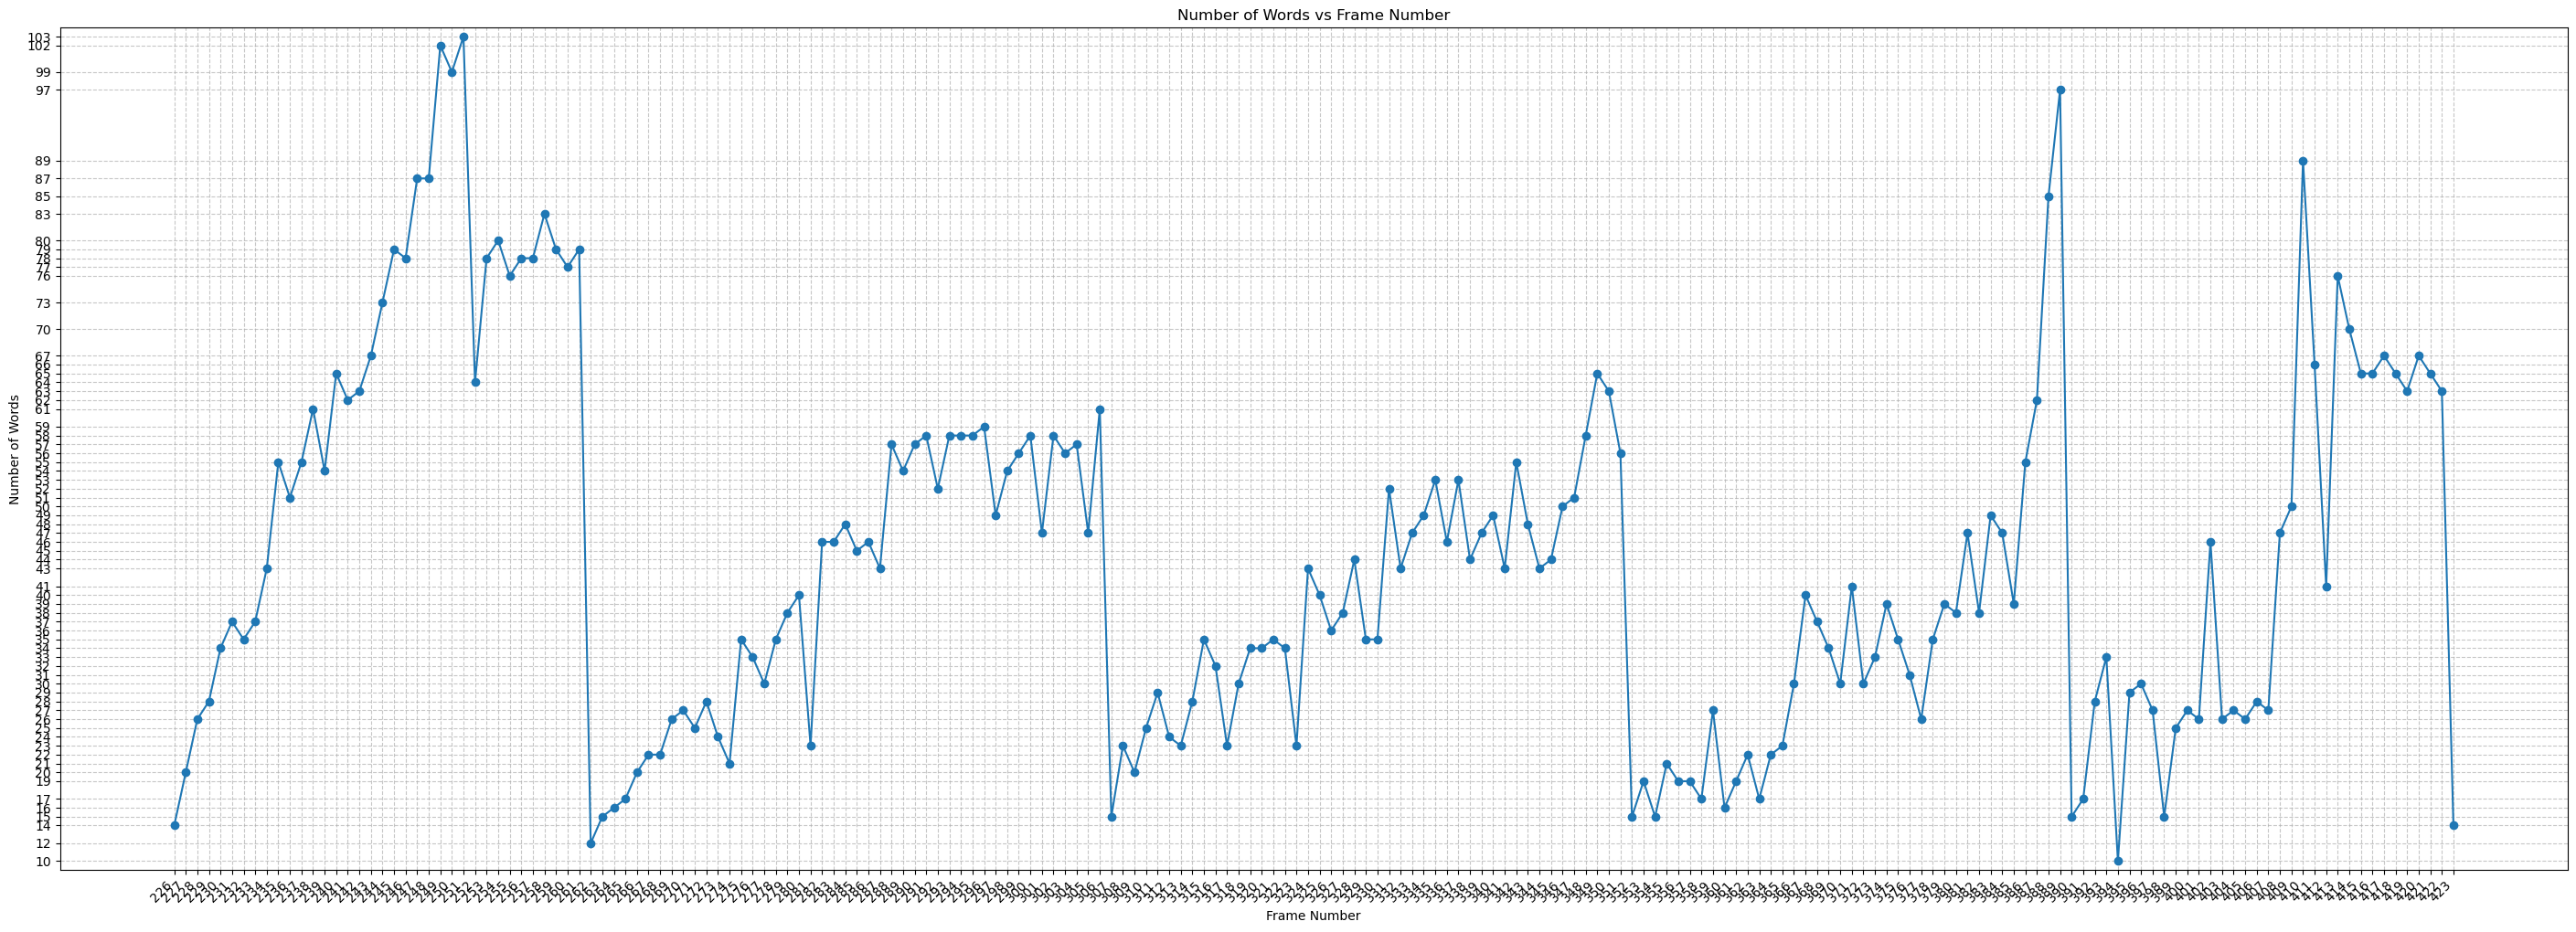

In [11]:
p(nframe_numbers, nword_counts)

In [12]:
def find_rising_segments(words, short_window=5, long_window=20, min_segment_length=10):
    # words = [point['words'] for point in data_points]
    
    # Calculate overall trend
    overall_trend = (words[-1] - words[0]) / len(words)
    
    # Calculate moving averages
    sma = calculate_moving_average(words, short_window)
    lma = calculate_moving_average(words, long_window)
    
    rising_segments = []
    current_segment_start = None
    
    # Adjust the range to account for the shorter length of moving averages
    for i in range(len(lma)):  # Use the length of the longer moving average (lma)
        sma_index = i + long_window - short_window  # Adjust index for sma
        
        if sma[sma_index] > lma[i] and current_segment_start is None:
            current_segment_start = i + long_window  # Adjust to original data index
        elif current_segment_start is not None:
            segment_length = (i + long_window) - current_segment_start
            recent_trend = (words[i + long_window] - words[current_segment_start]) / segment_length
            
            if sma[sma_index] <= lma[i] or recent_trend < overall_trend * 0.5:
                if segment_length >= min_segment_length:
                    rising_segments.append(current_segment_start)
                current_segment_start = None
    
    # Check if the last segment was rising
    if current_segment_start is not None:
        rising_segments.append(current_segment_start)
    
    return rising_segments

def calculate_moving_average(data, window):
    return [sum(data[i:i+window]) / window for i in range(len(data) - window + 1)]

In [22]:
words = nword_counts
short_window = 3
long_window = 30

In [23]:
sma = calculate_moving_average(words, short_window)
lma = calculate_moving_average(words, long_window)

In [24]:
sma[:5]


[20.0, 24.666666666666668, 29.333333333333332, 33.0, 35.333333333333336]

In [25]:

lma[:5]

[60.43333333333333, 62.56666666666667, 64.5, 66.4, 68.1]

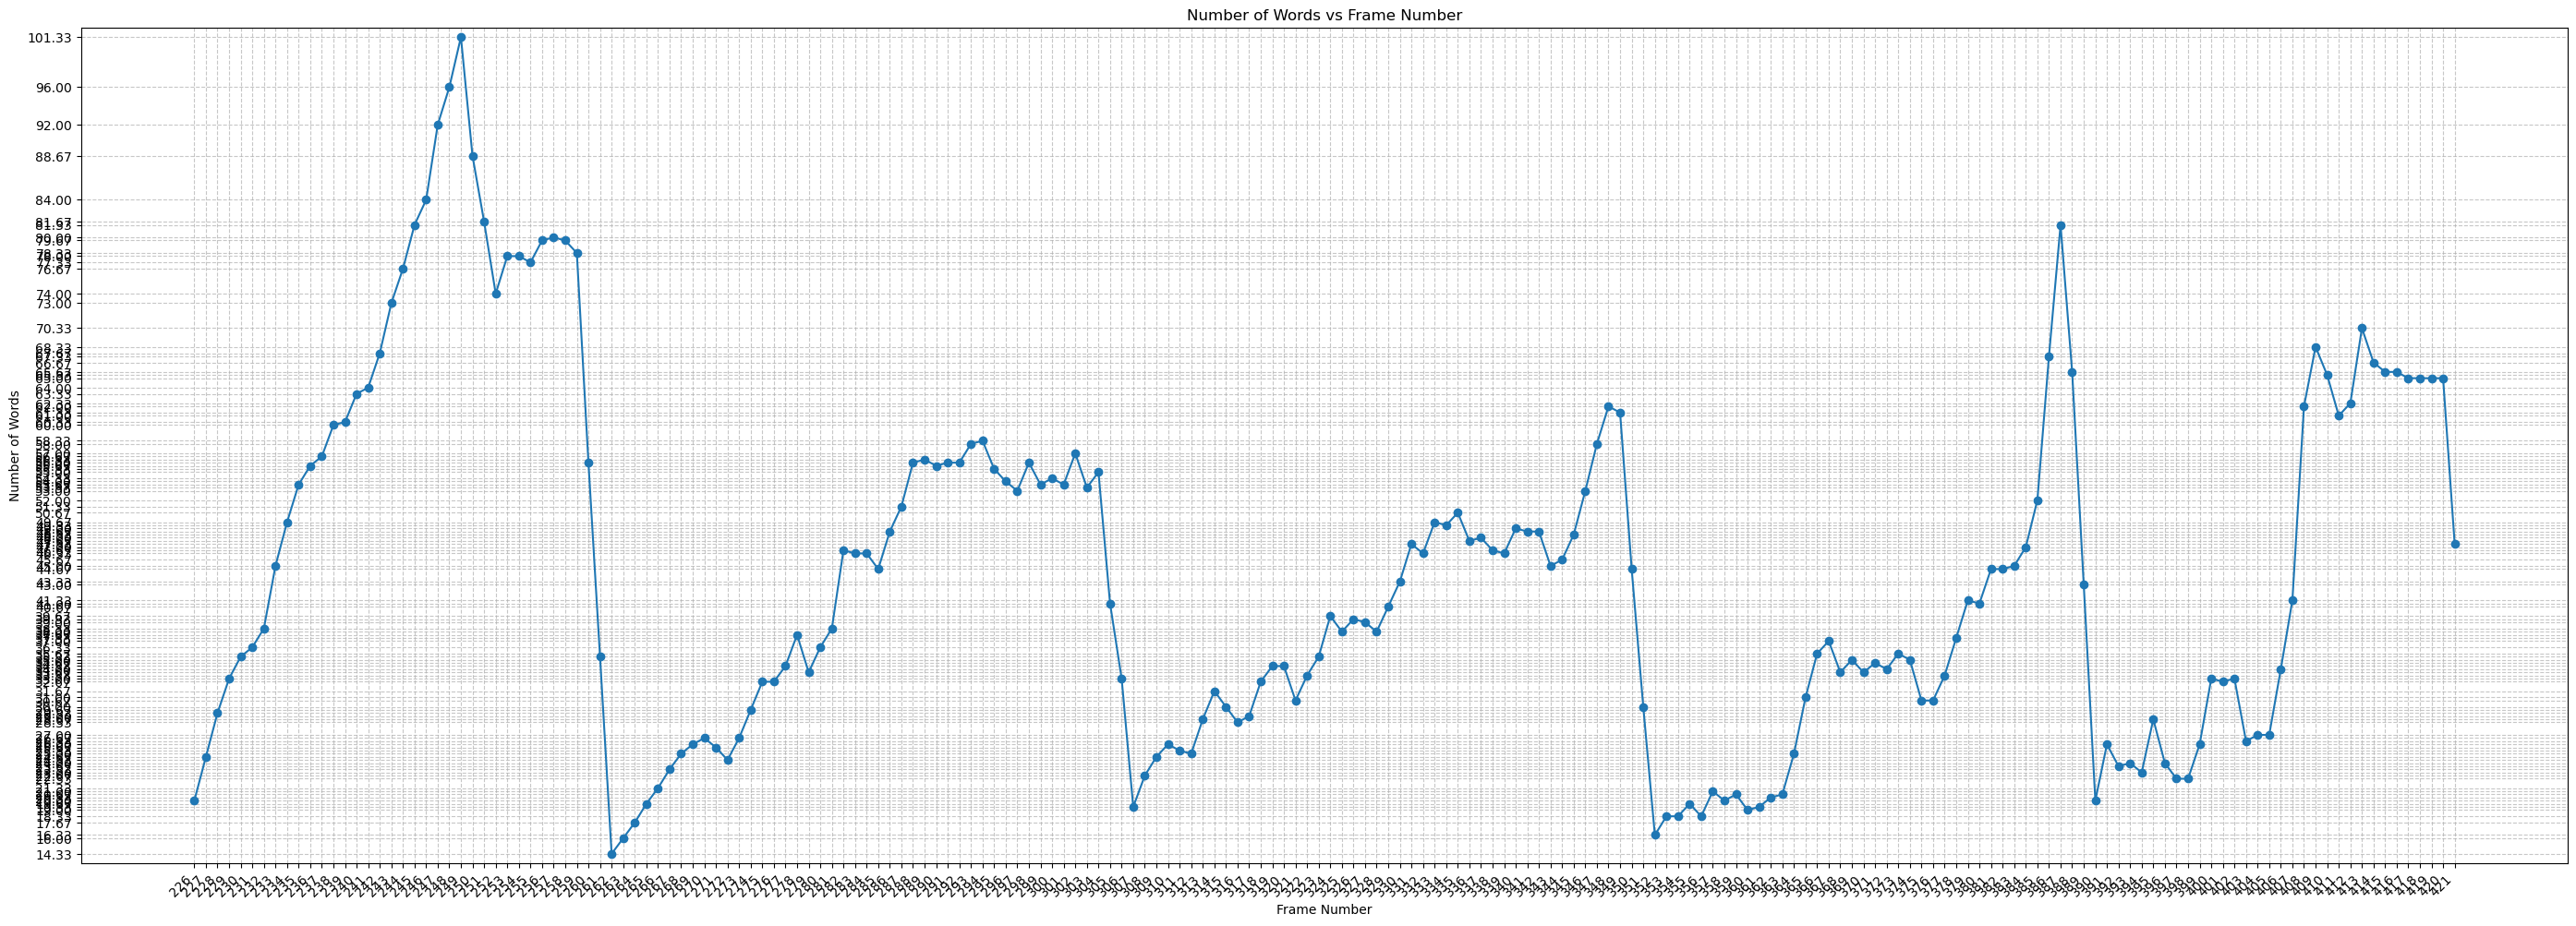

In [26]:
p(nframe_numbers[:len(sma)], sma)

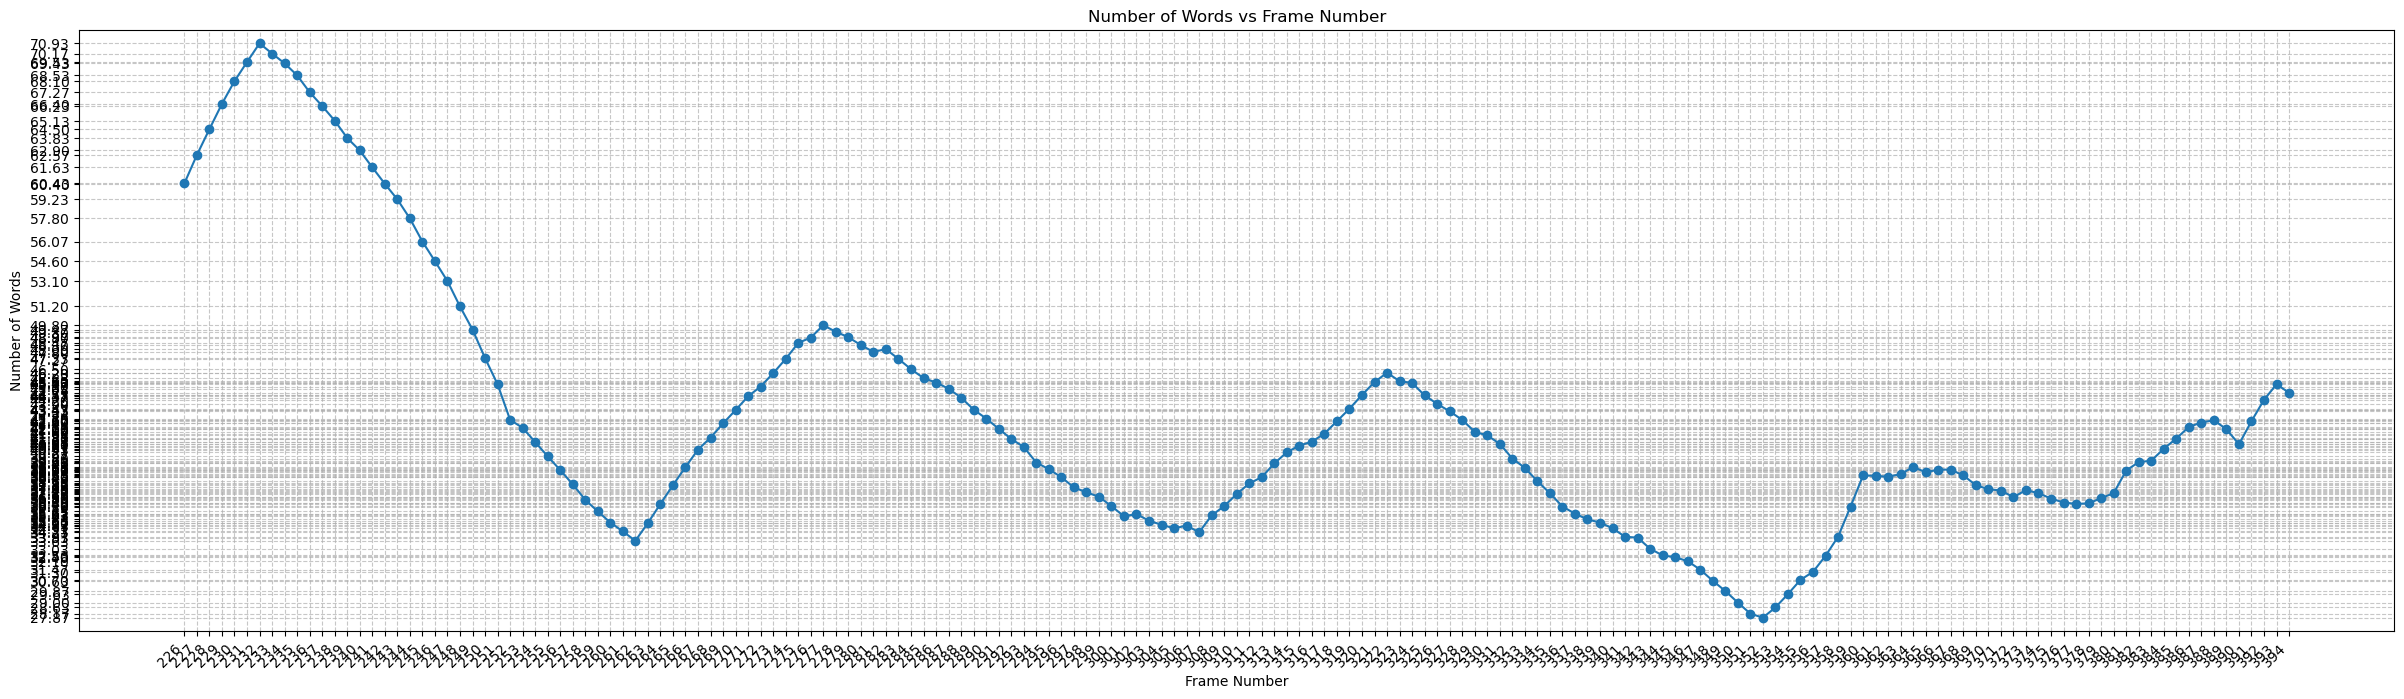

In [27]:
p(nframe_numbers[:len(lma)], lma)

In [19]:
ans = find_rising_segments(nword_counts)
ans

[97, 151, 198]

In [20]:
# for each ans, add start
ans = [start + i for i in ans]
ans

[323, 377, 424]

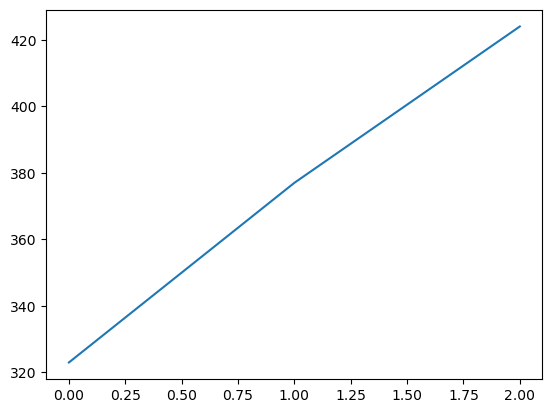

In [21]:
# plot vertical lines at the start of each rising segment
# use previous plot
plt.plot(ans,)